<center><h1> Heart Disease Prediction </h1></center>

### We are going to use the following attributes to predict:

1. age
2. sex - category
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2) 
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

### Contents of the Notebook:
#### [1. Importing and Exploratory Data Analysis](#1)
#### [2. Data Pre processing ](#2)
#### [3. Model Building](#3) 
##### [3.1 Logistic Regression](#4)
#### 4. Results

## <a id=1>Importing and Exploratory Data Analysis</a>

In [79]:
#importing the required libraries

import numpy as np 
import pandas as pd


#importing the data from heart.csv

data=pd.read_csv("heart.csv")


#exploring the head to have an outlook of the data

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [80]:
#checking for null values 

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [81]:
#looking at the shape

data.shape

(1025, 14)

In [82]:
#looking at the data types 

data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [83]:
#looking at the unique value of each column

data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [84]:
#converting all the below columns into categories for easier processing

for x in ["cp","sex","fbs","exang","restecg","slope","ca","thal"]:
    data[x]=data[x].astype("category")

data.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object

In [85]:
#getting an overview of the data 

data.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sex', ylabel='count'>

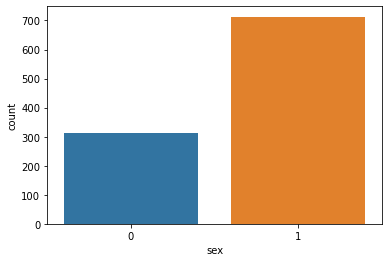

In [86]:
#plotting count of genders in the data

import seaborn as sns
sns.countplot(data.sex)

In [217]:
#plotting the distribution of age in the data


import plotly.figure_factory as ff
ff.create_distplot([data.age],["Age"])

In [88]:
#plotting the distribution of age with respect to genders

ff.create_distplot([data[data.sex==0].age,data[data.sex==1].age],["Age of Females","Age of Males"])

In [89]:
# grouping data by chest types to see if any chest pain type can attribute heart disease the most

import plotly.express as px
px.bar(data.groupby("cp").sum().reset_index()[["cp","target"]],x="cp",y="target",color="cp",title="Count Plot of Heart Disease with Respect to Chest Pain")

<center><h4>We can see that more than half the cases occured in cases where the type of chest pain is 2<h4></center>

In [90]:
# Finding the average resting blood pressure between the ones with heart disease and the ones without it. 

data.groupby("target").mean()["trestbps"]

target
0    134.106212
1    129.245247
Name: trestbps, dtype: float64

In [91]:
# Difference in Average Cholesterol between ones with heart disease and ones without it.

data.groupby("target").mean()["chol"]

target
0    251.292585
1    240.979087
Name: chol, dtype: float64

In [92]:
# Finding maximum average heart rate between ones with heart disease and ones without it

data.groupby("target").mean()["thalach"]

target
0    139.130261
1    158.585551
Name: thalach, dtype: float64

<center><h4>Here we can see there is a major difference between the ones with heart disease and the ones without it. </h4></center>

In [93]:
#plotting the distribution of maximum heart rate in ones with heart disease and ones without.

ff.create_distplot([data[data.target==0].thalach,data[data.target==1].thalach],["Max. Heart rate of ones without heart disease","Max. Heart rate of ones with heart disease"])

<center><h4>In the above Figure we can see the difference in the distribution of Maximum Heart Rate for the ones with Heart Disease, Their Heart seems to be working much harder during high intensity activities compared to resting rate. </h4></center>

<AxesSubplot:>

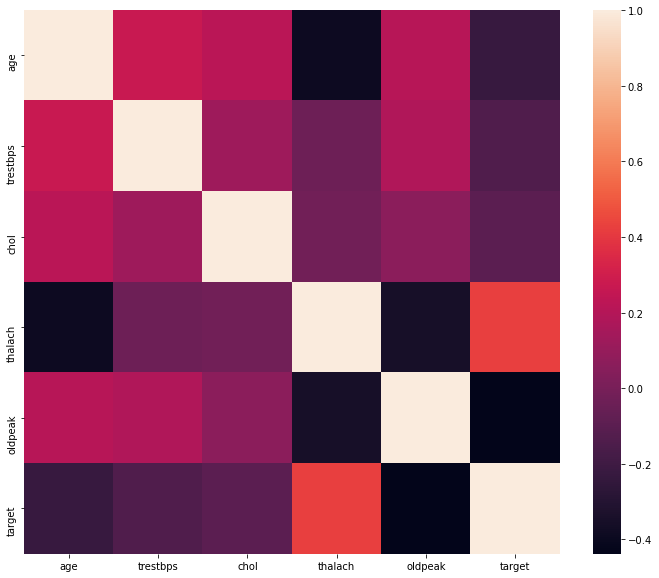

In [94]:
# plotting the correlation heatmap 

import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(data.corr())

In [98]:

#grouping by target to check mean 

data.groupby("target").mean()["oldpeak"]

target
0    1.600200
1    0.569962
Name: oldpeak, dtype: float64

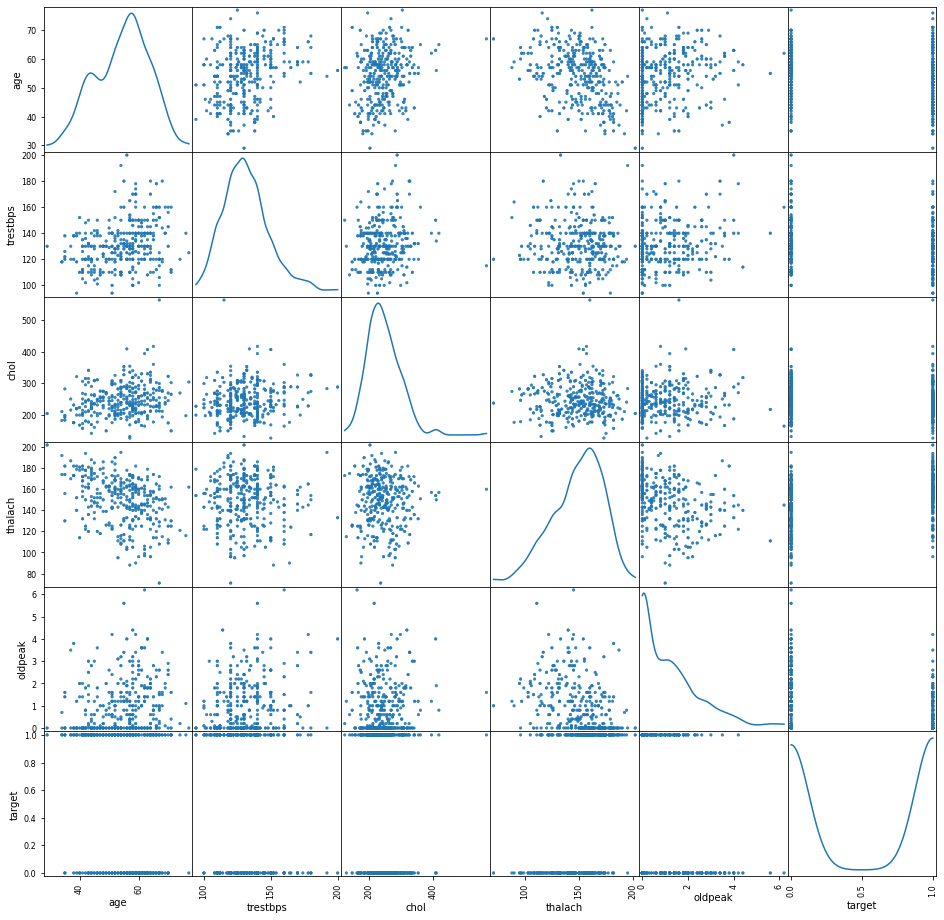

In [99]:
#Lets build the scatter matrix to see the relationship between the independent variables, to see if any are correlated


from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(16, 16), diagonal='kde')
plt.show()

In [103]:
#converting target to category

data.target=data.target.astype("category")

In [104]:
#finding the highest correlated independent variables

for x in data.corr().columns:
    print(np.abs(data.corr())[x].nlargest(2))

age        1.000000
thalach    0.390227
Name: age, dtype: float64
trestbps    1.000000
age         0.271121
Name: trestbps, dtype: float64
chol    1.000000
age     0.219823
Name: chol, dtype: float64
thalach    1.000000
age        0.390227
Name: thalach, dtype: float64
oldpeak    1.000000
thalach    0.349796
Name: oldpeak, dtype: float64


Although we have got less attributes, we can see how each are mostly indepent from others. But there are some noticable relations in the data. 

* When you see the graph between age and cholesterol, it shows and increasing trend. 
* Similarly, the maximum heartrate to age shows a decreasing trend. 
* The oldpeak (ST Depression induced by excercise, Basically an abnormality in the ECG relative to rest) is increasing in magnitude as age increases. 

This is a good healthy data with not much correlation upon independent variables. The maximum correlation found here is -0.34 and thats between thalach (max heart rate) variable and oldpeak


## <a id="2">Data Preprocessing</a>

In [155]:
# We will seperate the Independent variable and target variable 

X=data.iloc[:,:-1]

y=data.target

In [156]:
# Let's Split the data into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [157]:
#checking the shapes

print(X_train.shape,X_test.shape)

(717, 13) (308, 13)


In [158]:
#checking the head to see if we need to normalise or dummify

X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1004,51,0,2,140,308,0,0,142,0,1.5,2,1,2
292,61,1,2,150,243,1,1,137,1,1.0,1,0,2
525,51,0,2,130,256,0,0,149,0,0.5,2,0,2
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3
91,62,0,0,124,209,0,1,163,0,0.0,2,0,2


In [159]:
#splitting the data into numerical and categorical data types so that we can either standardise or dummify

X_train_num=X_train.select_dtypes(include=["int64","float64"])
X_test_num=X_test.select_dtypes(include=["int64","float64"])
X_train_cat=X_train.select_dtypes(include=["category"])
X_test_cat=X_test.select_dtypes(include=["category"])
print(X_train_num.columns,X_train_cat.columns)

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object') Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], dtype='object')


In [160]:
#standardising numerical variables 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num_stan=pd.DataFrame(scaler.transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)
X_test_num_stan=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)
X_test_num_stan

,age,trestbps,chol,thalach,oldpeak
677,0.942364,-0.091329,0.130493,-0.064089,0.254284
330,-1.920666,-0.674956,-0.621716,0.931107,-0.920902
538,-0.929617,-0.674956,0.034056,-0.193898,-0.249367
594,1.052481,0.784111,-0.679578,-0.713131,0.757936
147,-1.480200,-1.258583,-1.451075,0.411874,-0.920902
...,...,...,...,...,...
94,0.832248,-0.208054,-0.756728,-0.366975,-0.920902
421,-1.370083,-1.725485,0.342654,-1.145825,-0.417251
329,-0.158801,-0.208054,-0.602429,-1.448711,-0.920902
497,0.281665,1.309376,-0.293830,0.671491,-0.920902


In [161]:
# dummifying Categorical Variables

X_train_cat_dum=pd.get_dummies(X_train_cat)
X_test_cat_dum=pd.get_dummies(X_test_cat)

In [162]:
# Merging the numerical and categorical dataframes

X_train_final=pd.concat([X_train_num_stan,X_train_cat_dum],axis=1)
X_test_final=pd.concat([X_test_num_stan,X_test_cat_dum],axis=1)

## <a id="3">Model Building</a> 

### <a id ="4">Logistic Regression </a>

In [210]:
# We will build a Regression model using statsmodels API, this gives us a deep description into the model, the fit,
# the residual information, etc. However, Since this is a very old library, it has some restrictions

import statsmodels.api as sm

#defining the model 
lr=sm.Logit(y_train,X_train_final).fit()

#let's look at the summary

print(lr.summary())

         Current function value: 0.289345
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  717
Model:                          Logit   Df Residuals:                      694
Method:                           MLE   Df Model:                           22
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.5824
Time:                        13:57:39   Log-Likelihood:                -207.46
converged:                      False   LL-Null:                       -496.83
Covariance Type:            nonrobust   LLR p-value:                2.504e-108
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.2349      0.153      1.537      0.124      -0.065       0.535
trestbps      -0.3068      0.139     -2.211      0.027      -0.57

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<center><h4> From the above model we can see that the resting blood pressure(trestbps), maximum heart rate(thalach) and the oldpeak have the most significance. The Adjusted R-squared above is 0.58. This means it can only explain 58% of the residuals. </h4></center>

In [211]:
# Getting the predictions from the training dataset 
train_predictions=lr.predict(X_train_final)

In [212]:
# Compute ROC curve and ROC area for each class

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_train, train_predictions)
roc_auc = auc(fpr, tpr)

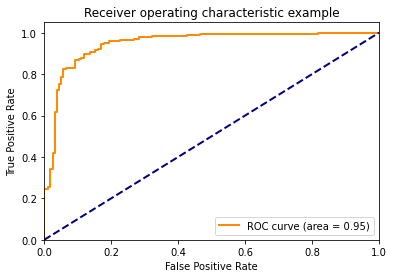

In [213]:
#plotting the roc curve 

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<b>Looking at the above ROC curve, the threshold i decided to put for the test predictions is 0.15, since we need the best recall possible. Ideally we dont want any false negetives since we want to test for the heart disease. If there is a false positive, the doctor can go in depth to look into it. But if it goes unnoticed a life is at risk <b>

In [214]:
# Getting the test predictions 

test_predictions=lr.predict(X_test_final)
test_predictions=[0 if x<0.15 else 1 for x in test_predictions]

In [215]:
# Now lets get the metrics

#classification Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Accuracy for Test set:")
print(accuracy_score(y_test,test_predictions))

print("Recall for Test set:")
print(recall_score(y_test,test_predictions,pos_label=1))

print("Precision for Test set:")
print(precision_score(y_test,test_predictions,pos_label=1))

Accuracy for Test set:
0.8051948051948052
Recall for Test set:
0.96875
Precision for Test set:
0.7380952380952381


<center><h4> Looking at the metrics, this is good model, but there is a lot of scope for optmisation </h4></center>

In [218]:
# To be continued tomorrow